In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score



2024-03-07 11:23:15.225715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 11:23:15.225847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 11:23:15.355026: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle 
import tensorflow as tf

folder paths

In [4]:
X_train =[]
Y_train =[]
image_size =150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
train test split

In [6]:
X_train,X_test,y_train,y_test =train_test_split(X_train,Y_train,test_size=0.1,random_state=101)


In [7]:
y_train_new =[]
for i in y_train:
    y_train_new.append(labels.index(i))
    y_train=y_train_new
    y_train= tf.keras.utils.to_categorical(y_train)
    
y_test_new =[]
for i in y_test:
    y_test_new.append(labels.index(i))
    y_test = y_test_new
    y_test = tf.keras.utils.to_categorical(y_test)
       

In [ ]:
convolutional neural network

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 169ms/step - accuracy: 0.2873 - loss: 8276.0469 - val_accuracy: 0.2891 - val_loss: 50357.1797
Epoch 2/20
 3/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3403 - loss: 38807.5234

W0000 00:00:1709813525.005651     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.2912 - loss: 104541.6328 - val_accuracy: 0.2619 - val_loss: 1.8739
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2742 - loss: 49267.9375 - val_accuracy: 0.2925 - val_loss: 2.2549
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2806 - loss: 116704.6875 - val_accuracy: 0.2925 - val_loss: 2.2389
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2628 - loss: 30931.9688 - val_accuracy: 0.2619 - val_loss: 2.2908
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.2764 - loss: 9.7174 - val_accuracy: 0.2619 - val_loss: 2.3313
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2878 - loss: 1.3632 - val_accuracy: 0.2619 - val_loss: 1.7086
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2949 - loss: 1.3561 - val_accuracy: 0.2619 - val_loss: 1.7167
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2965 - loss: 1.3530 - val_accuracy: 0.2

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

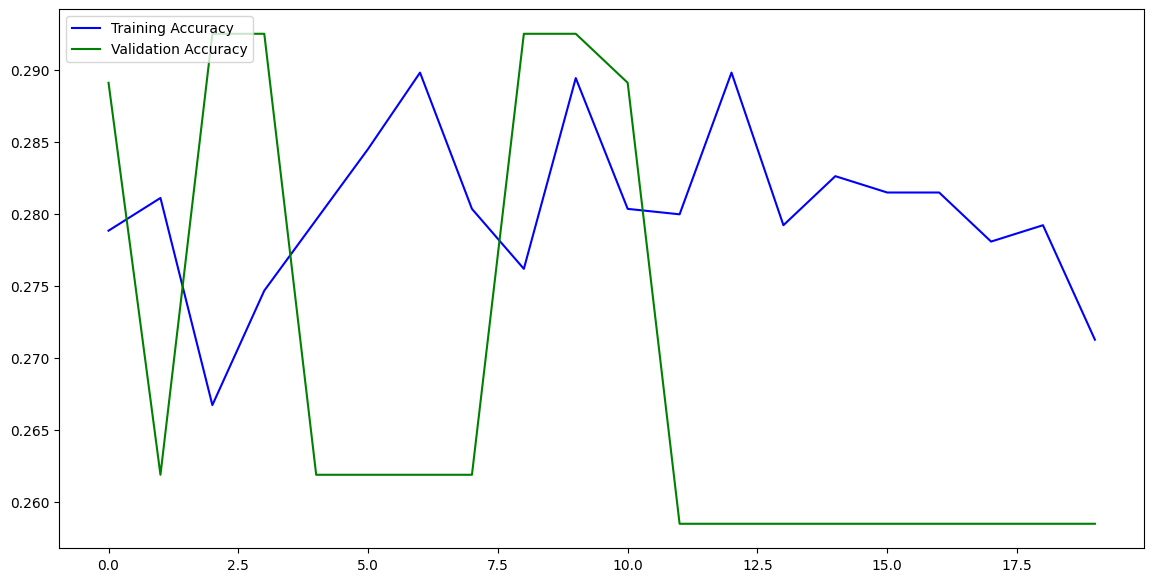

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'b',label="Training Accuracy")
plt.plot(epochs,val_acc,'g',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

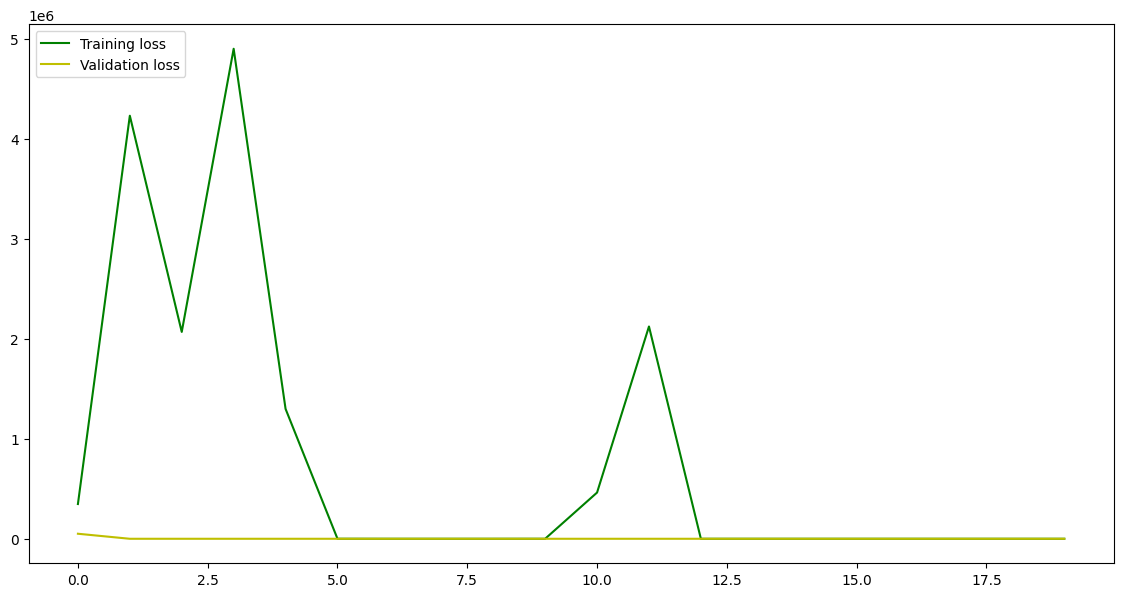

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'g',label="Training loss")
plt.plot(epochs,val_loss,'y',label="Validation loss")
plt.legend(loc='upper left')
plt.show()
     

In [30]:

import cv2
import numpy as np

img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(18).jpg')

if img is None:
    print("Error: Image not loaded")
img = cv2.resize(img, (150, 150))

img_array = np.array(img)
print(img_array.shape)

(150, 150, 3)


In [31]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

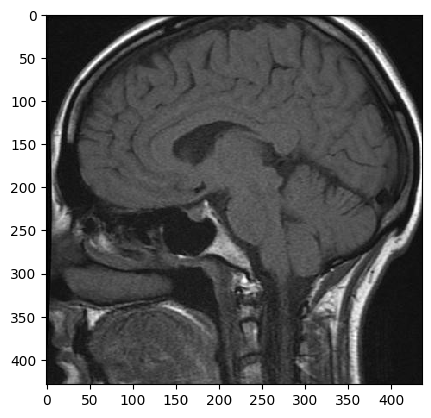

In [33]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(18).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
     

In [35]:
a=model.predict(img_array)
indices = a.argmax()
labels[indices]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'pituitary_tumor'